In [5]:
import os
import re

# Directory path to the directory containing merged files
input_directory = '/Users/shaistasyeda/Desktop/DataSet/Merged-Files'

# Initialize dictionaries to store pronoun counts
male_pronoun_counts = {}
female_pronoun_counts = {}

# Define regular expressions for male and female pronouns
male_pronouns = r'\b(he|him|his)\b'
female_pronouns = r'\b(she|her|hers)\b'

# Loop through the merged files
for file_name in os.listdir(input_directory):
    if file_name.endswith('.txt'):
        with open(os.path.join(input_directory, file_name), 'r', encoding='utf-8') as file:
            text = file.read()

            # Split text into sentences 
            sentences = re.split(r'\. ', text)

            # Initialize counts for male and female pronouns 
            male_count = 0
            female_count = 0

            # Count male and female pronoun occurrences in the sentences
            for sentence in sentences:
                male_count += len(re.findall(male_pronouns, sentence, re.IGNORECASE))
                female_count += len(re.findall(female_pronouns, sentence, re.IGNORECASE))

            # Store counts in the dictionaries
            file_name_without_extension = os.path.splitext(file_name)[0]
            male_pronoun_counts[file_name_without_extension] = male_count
            female_pronoun_counts[file_name_without_extension] = female_count

# Print male and female pronoun counts for each merged file
for file_name, male_count in male_pronoun_counts.items():
    female_count = female_pronoun_counts[file_name]
    print(f'File: {file_name}, Male Pronoun Count: {male_count}, Female Pronoun Count: {female_count}')


File: merged_file_1990, Male Pronoun Count: 1337801, Female Pronoun Count: 180784
File: merged_file_1950, Male Pronoun Count: 1320727, Female Pronoun Count: 60305
File: merged_file_1850, Male Pronoun Count: 1923847, Female Pronoun Count: 82447
File: merged_file_2006, Male Pronoun Count: 724562, Female Pronoun Count: 161679
File: merged_file_1900, Male Pronoun Count: 2272550, Female Pronoun Count: 131343
File: merged_file_1970, Male Pronoun Count: 867576, Female Pronoun Count: 90012


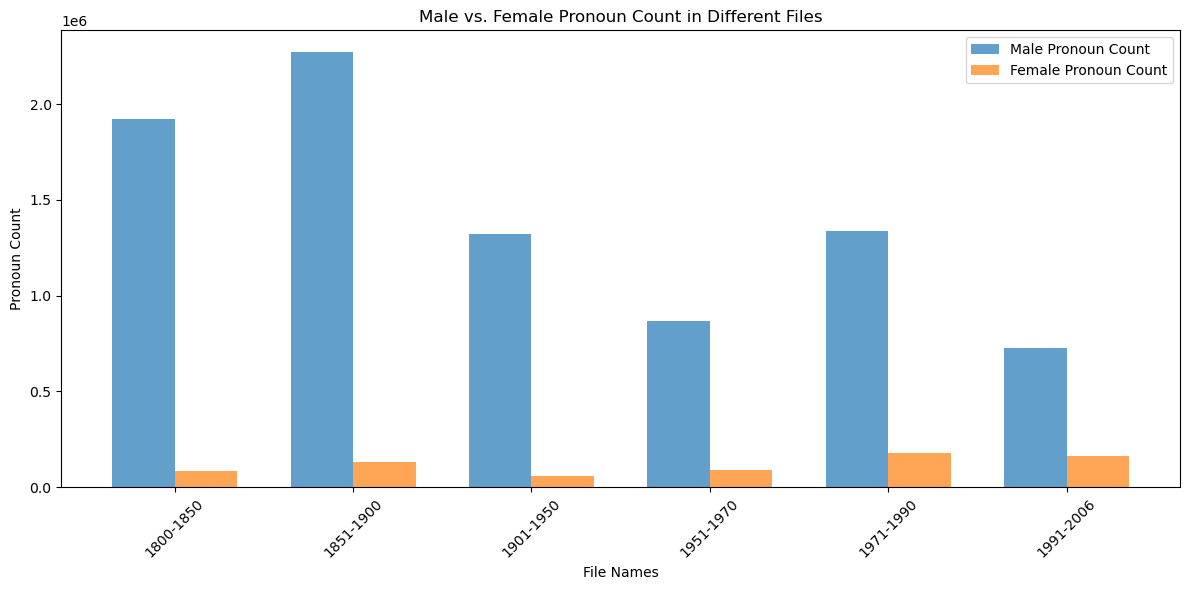

In [7]:
import matplotlib.pyplot as plt

# Data
file_names = ["1800-1850", "1851-1900", "1901-1950", "1951-1970","1971-1990","1991-2006"]
male_counts = [1923847, 2272550, 1320727, 867576, 1337801, 724562]
female_counts = [82447, 131343, 60305, 90012, 180784, 161679]

# Create a bar graph
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = range(len(file_names))

plt.bar(index, male_counts, bar_width, label='Male Pronoun Count', alpha=0.7)
plt.bar([i + bar_width for i in index], female_counts, bar_width, label='Female Pronoun Count', alpha=0.7)

plt.xlabel('File Names')
plt.ylabel('Pronoun Count')
plt.title('Male vs. Female Pronoun Count in Different Files')
plt.xticks([i + bar_width/2 for i in index], file_names, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


In [4]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.0.0/en_core_web_sm-3.0.0.tar.gz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 1.8 MB/s eta 0:00:0000:0100:01m
  Preparing metadata (setup.py) ... done
  Using cached spacy-3.0.9.tar.gz (989 kB)
  Installing build dependencies ... error
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> [373 lines of output]
        Obtaining dependency information for setuptools from https://files.pythonhosted.org/packages/bb/26/7945080113158354380a12ce26873dd6c1ebd88d47f5bc24e2c5bb38c16a/setuptools-68.2.2-py3-none-any.whl.metadata
        Using cached setuptools-68.2.2-py3-none-any.whl.metadata (6.3 kB)
        Obtaining dependency information for cython<3.0,>=0.25 from https://files.pythonhosted.org/packages/3f/d6/9eed523aeaca42acbaa3e6d3850edae780dc7f8da9df1bf6a2ceb851839c/Cython-0.29.36-py2.py3-none-any.whl.metadata
        Using cached Cython-0.29.36-py2.py3-none-any.whl.metadata (3.1 kB)
        Obtaining dependency information 

            reading manifest template 'MANIFEST.in'
            no previously-included directories found matching 'tmp/'
            adding license file 'LICENSE'
            writing manifest file 'thinc.egg-info/SOURCES.txt'
            /private/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/pip-build-env-9a9gyzp9/overlay/lib/python3.11/site-packages/setuptools/command/build_py.py:204: _Warning: Package 'thinc.tests.mypy.configs' is absent from the `packages` configuration.
            !!
           
                    ********************************************************************************
                    ############################
                    # Package would be ignored #
                    ############################
                    Python recognizes 'thinc.tests.mypy.configs' as an importable package[^1],
                    but it is absent from setuptools' `packages` configuration.
           
                    This leads to an ambiguous overall co

Note: you may need to restart the kernel to use updated packages.


In [4]:
import os
import re
import spacy

# Load the spaCy language model
nlp = spacy.load("en_core_web_sm")
nlp.max_length = 200000000 

# Directory path to the directory containing merged files
input_directory = '/Users/shaistasyeda/Desktop/DataSet/Merged-Files'

# Initialize dictionaries to store pronoun counts
male_pronoun_counts = {}
female_pronoun_counts = {}

# Define regular expressions for male and female pronouns
male_pronouns = r'\b(he|him|his)\b'
female_pronouns = r'\b(she|her|hers)\b'

# Loop through the merged files
for file_name in os.listdir(input_directory):
    if file_name.endswith('.txt'):
        with open(os.path.join(input_directory, file_name), 'r', encoding='utf-8') as file:
            text = file.read()

            # Tokenize text using spaCy
            doc = nlp(text)

            # Initialize counts for male and female pronouns
            male_count = 0
            female_count = 0

            # Count male and female pronoun occurrences in the tokens
            for token in doc:
                if re.search(male_pronouns, token.text, re.IGNORECASE):
                    male_count += 1
                if re.search(female_pronouns, token.text, re.IGNORECASE):
                    female_count += 1

            # Store counts in the dictionaries
            file_name_without_extension = os.path.splitext(file_name)[0]
            male_pronoun_counts[file_name_without_extension] = male_count
            female_pronoun_counts[file_name_without_extension] = female_count

# Print male and female pronoun counts for each merged file
for file_name, male_count in male_pronoun_counts.items():
    female_count = female_pronoun_counts[file_name]
    print(f'File: {file_name}, Male Pronoun Count: {male_count}, Female Pronoun Count: {female_count}')


ValueError: [E088] Text of length 937351848 exceeds maximum of 200000000. The parser and NER models require roughly 1GB of temporary memory per 100,000 characters in the input. This means long texts may cause memory allocation errors. If you're not using the parser or NER, it's probably safe to increase the `nlp.max_length` limit. The limit is in number of characters, so you can check whether your inputs are too long by checking `len(text)`.

In [8]:
import os
import re

# Directory path to the directory containing merged files
input_directory = '/Users/shaistasyeda/Desktop/DataSet/Merged-Files'

# Initialize dictionaries to store pronoun counts
male_pronoun_counts = {}
female_pronoun_counts = {}

# Define regular expressions for male and female pronouns
male_pronouns = r'\b(he|him|his|himself)\b'
female_pronouns = r'\b(she|her|hers|herself)\b'

# Loop through the merged files
for file_name in os.listdir(input_directory):
    if file_name.endswith('.txt'):
        with open(os.path.join(input_directory, file_name), 'r', encoding='utf-8') as file:
            text = file.read()

            # Split text into sentences 
            sentences = re.split(r'\. ', text)

            # Initialize counts for male and female pronouns 
            male_count = 0
            female_count = 0

            # Count male and female pronoun occurrences in the sentences
            for sentence in sentences:
                male_count += len(re.findall(male_pronouns, sentence, re.IGNORECASE))
                female_count += len(re.findall(female_pronouns, sentence, re.IGNORECASE))

            # Store counts in the dictionaries
            file_name_without_extension = os.path.splitext(file_name)[0]
            male_pronoun_counts[file_name_without_extension] = male_count
            female_pronoun_counts[file_name_without_extension] = female_count

# Print male and female pronoun counts for each merged file
for file_name, male_count in male_pronoun_counts.items():
    female_count = female_pronoun_counts[file_name]
    print(f'File: {file_name}, Male Pronoun Count: {male_count}, Female Pronoun Count: {female_count}')


File: merged_file_1990, Male Pronoun Count: 1351676, Female Pronoun Count: 182255
File: merged_file_1950, Male Pronoun Count: 1353612, Female Pronoun Count: 62383
File: merged_file_1850, Male Pronoun Count: 1982734, Female Pronoun Count: 84739
File: merged_file_2006, Male Pronoun Count: 729843, Female Pronoun Count: 162604
File: merged_file_1900, Male Pronoun Count: 2334650, Female Pronoun Count: 133981
File: merged_file_1970, Male Pronoun Count: 884295, Female Pronoun Count: 91288
